In [1]:
import os
os.getcwd()

'/content'

In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/diabetes_prediction'

/content/drive/My Drive/Colab Notebooks/diabetes_prediction


In [ ]:
ls

diabetes_data_upload.csv  disease.hdf5              heart_disease.h5
disease_0.9798.hdf5       heart_disease1_0.9798.h5  model.hdf5
disease1.hdf5             heart_disease1.h5         new_disease1.hdf5


# **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading CSV File


In [ ]:
data=pd.read_csv('diabetes_data_upload.csv')
data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


# Getting Dataset Insights  

In [ ]:
# shape of the dataset i.e no of rows and columns
data.shape

(520, 17)

We have 520 rows corresponding to total no of datasamples collected
and 17 columns out of which 16 columns corresponds to heart disease predicting features .

In [ ]:
# columns name of the dataset 
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
#informations of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Checking Null Values

In [ ]:
data.isnull().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [ ]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# Checking Unique Values In Each Column 

In [ ]:
data.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

# Getting Heart-Disease Positive and Negative Case Count in a dataset

In [ ]:
data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [ ]:
print("Number Of people having heart disease positive in dataset are ",data['class'].value_counts()[0])
print("Number Of people having heart disease negative in dataset are",data['class'].value_counts()[1])

Number Of people having heart disease positive in dataset are  320
Number Of people having heart disease negative in dataset are 200


In [ ]:
data['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [ ]:
data[data['class']=='Positive']['Gender'].value_counts()

Female    173
Male      147
Name: Gender, dtype: int64

In [ ]:
data[~(data['class']=='Positive')]['Gender'].value_counts()

Male      181
Female     19
Name: Gender, dtype: int64

In [ ]:
print("The Percentage Of Male Susceptible to heart disease is",(147/328)*100)
print("The Percentage Of Female Susceptible to heart disease is",(173/192)*100)

The Percentage Of Male Susceptible to heart disease is 44.81707317073171
The Percentage Of Female Susceptible to heart disease is 90.10416666666666


# **Data Visualization** 

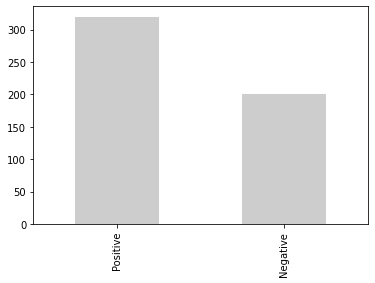

In [ ]:
data['class'].value_counts().plot(kind='bar',color="#cdcdcd")

Positive Count is more than Negative Count

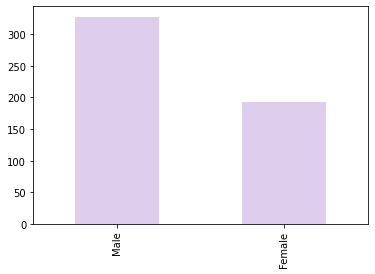

In [ ]:
data['Gender'].value_counts().plot(kind='bar',color="#decded")

Male Count is more than Female in dataset

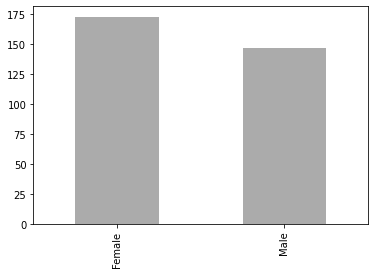

In [ ]:
data[data['class']=='Positive']['Gender'].value_counts().plot(kind='bar',color="#ababab")

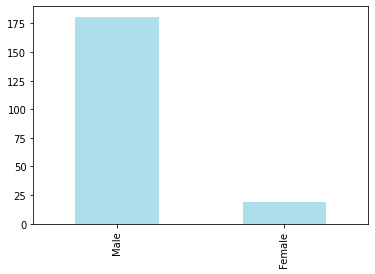

In [ ]:
data[~(data['class']=='Positive')]['Gender'].value_counts().plot(kind="bar",color="#acdfe9")

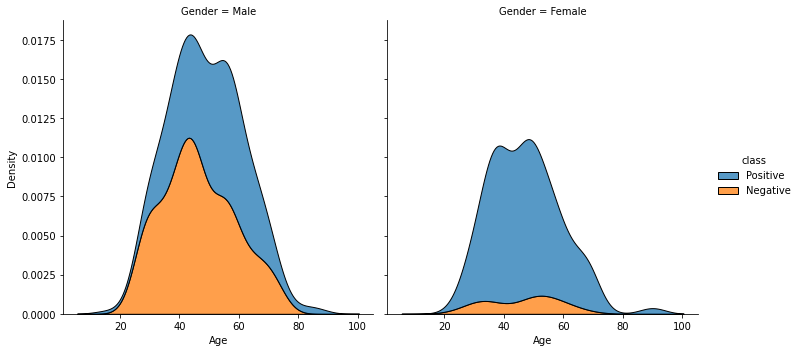

In [ ]:
sns.displot(data=data, x="Age", hue="class",col="Gender",multiple="stack", kind="kde")

Incase Of Male:Both Positive and Negative is normally distributed
 
Incase Of Female:It is not the case of above.Irregualrity in negative case as age advances .Hence Normalization Technique should apply to Age Column.

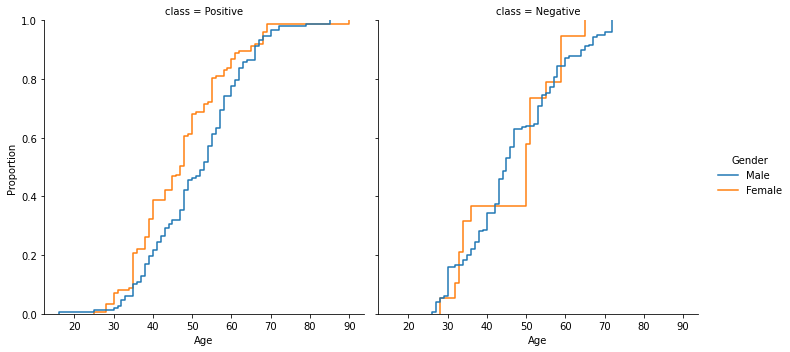

In [ ]:
sns.displot(data,x='Age',hue="Gender",col="class",kind="ecdf")

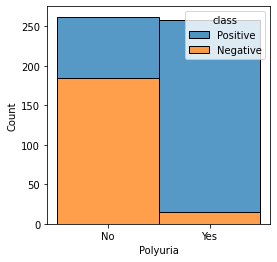

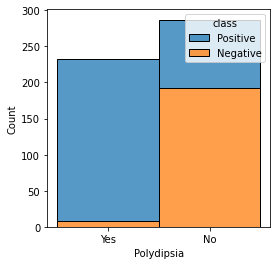

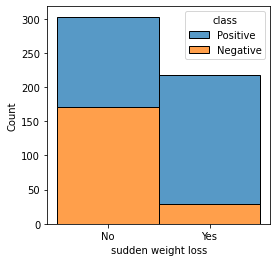

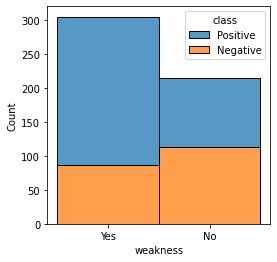

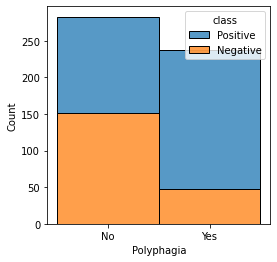

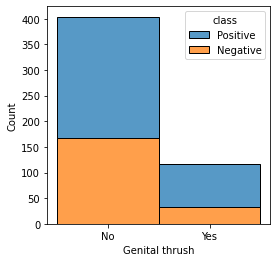

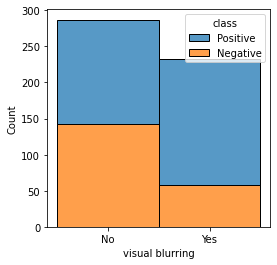

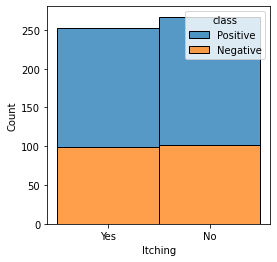

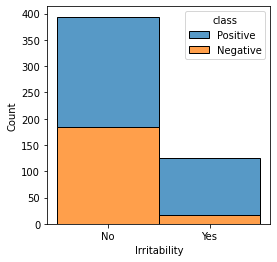

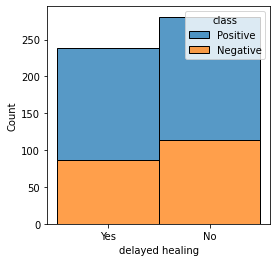

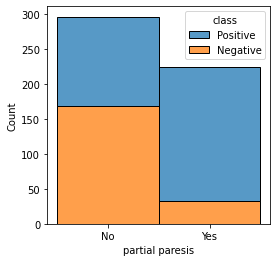

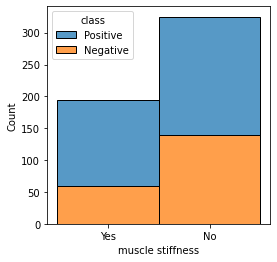

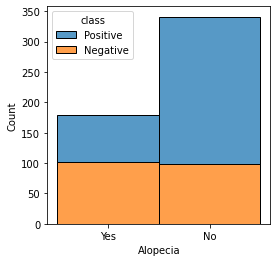

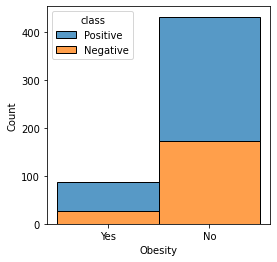

In [ ]:
colu_lis=[]
for i in data.columns:
  if i!='Age' and i!='class' and i!='Gender':
    colu_lis.append(i)
  else:
    continue

for i in colu_lis:
  
  fig,ax=plt.subplots(figsize=(4,4))
  sns.histplot(data=data,x=i,hue="class",multiple="stack")


# Encoding Categorical Columns Using Sckit Learn Preprocessing Label Encoder

In [ ]:
#encoding the categorical data
from sklearn.preprocessing import LabelEncoder
col_lis=[]
for i in data.columns:
  if i!='Age':
    col_lis.append(i)
  else:
    continue
    
le=LabelEncoder()
for i in data.columns:
  data[i]=le.fit_transform(data[i])


# Corrrelation between columns

In [ ]:
corr=data.corr()
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.067835,0.209066,0.130718,0.056937,0.233688,0.325301,0.080612,0.405024,0.293839,0.210919,0.265017,0.236820,0.304223,0.326015,0.149931,0.106419
Gender,0.067835,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.209066,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.130718,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.056937,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.233688,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.325301,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.080612,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.405024,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.293839,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


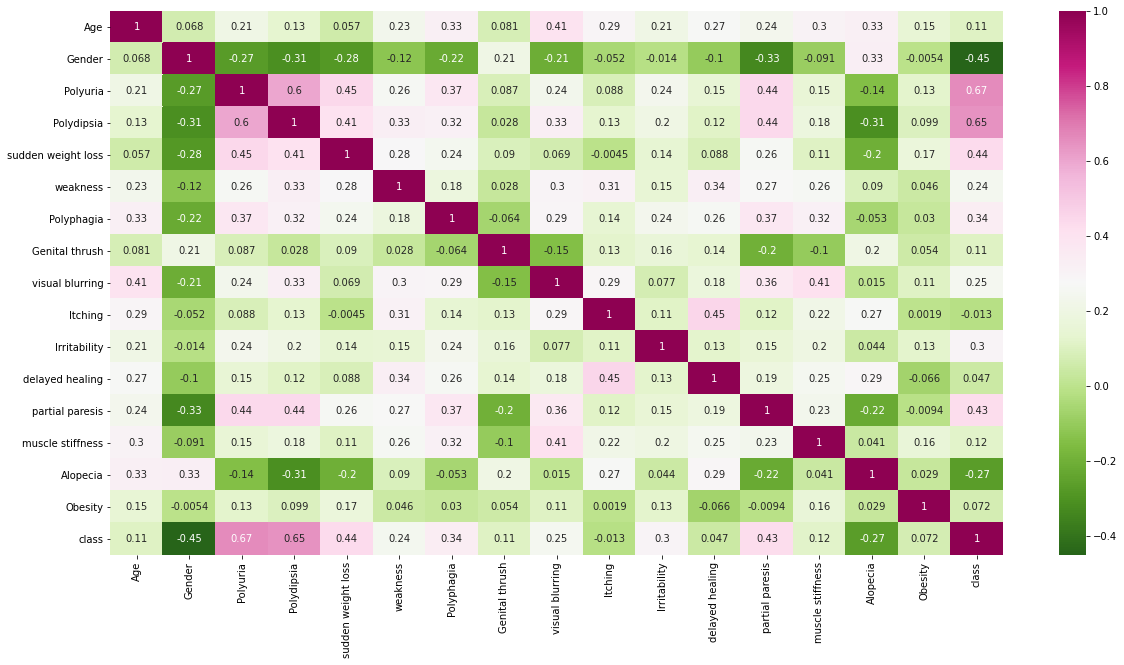

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),cmap="PiYG_r",annot=True)

In [ ]:
#assign Class Values to Y_value variable and drop it from dataset
Y_value=data['class'].values
data.drop('class',axis=1,inplace=True)

# Normalize Data Using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names=data.columns
data[col_names] = scaler.fit_transform(data.values)
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.673217,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
1,0.859575,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335
2,-0.588061,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335
3,-0.247441,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335
4,1.029885,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.758372,-1.307032,1.007722,1.109847,1.181657,-1.191052,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,1.149534,-0.774597,-0.724518,-0.451335
516,0.008024,-1.307032,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,-0.901025,1.027295,1.768328,1.084312,1.149534,-0.774597,-0.724518,-0.451335
517,0.859575,-1.307032,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,1.290994,-0.724518,2.215647
518,-1.354457,-1.307032,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,1.027295,-0.565506,1.084312,-0.869918,-0.774597,1.380227,-0.451335


In [ ]:
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
count,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02
mean,-5.166807e-17,-7.045646e-17,1.099975e-15,-1.190928e-15,-3.975452e-16,5.734729e-16,-7.015755e-16,-1.985591e-16,-1.921540e-18,6.533235e-17,3.454502e-16,-3.036033e-16,1.298534e-15,8.070467e-17,2.070993e-16,-1.509476e-16
std,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00
min,-2.035698e+00,-1.307032e+00,-9.923371e-01,-9.010254e-01,-8.462692e-01,-1.191052e+00,-9.151261e-01,-5.358439e-01,-9.010254e-01,-9.734298e-01,-5.655059e-01,-9.222439e-01,-8.699177e-01,-7.745967e-01,-7.245182e-01,-4.513355e-01
25%,-7.583716e-01,-1.307032e+00,-9.923371e-01,-9.010254e-01,-8.462692e-01,-1.191052e+00,-9.151261e-01,-5.358439e-01,-9.010254e-01,-9.734298e-01,-5.655059e-01,-9.222439e-01,-8.699177e-01,-7.745967e-01,-7.245182e-01,-4.513355e-01
50%,-3.455332e-02,7.650921e-01,-9.923371e-01,-9.010254e-01,-8.462692e-01,8.395940e-01,-9.151261e-01,-5.358439e-01,-9.010254e-01,-9.734298e-01,-5.655059e-01,-9.222439e-01,-8.699177e-01,-7.745967e-01,-7.245182e-01,-4.513355e-01
75%,7.744201e-01,7.650921e-01,1.007722e+00,1.109847e+00,1.181657e+00,8.395940e-01,1.092746e+00,-5.358439e-01,1.109847e+00,1.027295e+00,-5.655059e-01,1.084312e+00,1.149534e+00,1.290994e+00,1.380227e+00,-4.513355e-01
max,2.222057e+00,7.650921e-01,1.007722e+00,1.109847e+00,1.181657e+00,8.395940e-01,1.092746e+00,1.866215e+00,1.109847e+00,1.027295e+00,1.768328e+00,1.084312e+00,1.149534e+00,1.290994e+00,1.380227e+00,2.215647e+00


In [ ]:
# convert dataset into matrix and assign it to X_value variable 
X_value=np.matrix(data)

# Split dataset into test and train dataset using sklearn model selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_value,Y_value,train_size = 0.85,random_state=39)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((442, 16), (78, 16), (442,), (78,))

# **Artificial Neural Network For Training and Preparing Model**

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
Y_train=keras.utils.to_categorical(Y_train,2)
Y_test=keras.utils.to_categorical(Y_test,2)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=128,activation='relu',input_shape=(16,)))
model.add(Dropout(0.2))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2,activation='softmax'))

In [ ]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
my_model=model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 0.8642 - accuracy: 0.4299 - val_loss: 0.6332 - val_accuracy: 0.7949
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6260 - accuracy: 0.6576 - val_loss: 0.5273 - val_accuracy: 0.8846
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.6924 - val_loss: 0.3796 - val_accuracy: 0.8974
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.7565 - val_loss: 0.2826 - val_accuracy: 0.9103
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8075 - val_loss: 0.2221 - val_accuracy: 0.9359
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3383 - accuracy: 0.8134 - val_loss: 0.1769 - val_accuracy: 0.9231
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.8612 - val_loss: 0.1547 - val_accuracy: 0.9359
Epoch 8/100


In [ ]:
test_mode=model.evaluate(X_test,Y_test,batch_size=32)

3/3 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9872


In [ ]:
model.save('new__model.hdf5')

In [ ]:
my_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=my_model.history['loss'],mode='lines',name='Training'))
fig.add_trace(go.Scatter(y=my_model.history['val_loss'],mode='lines',name='Validation'))
fig.update_layout(title='Loss:Categorical Cross Entropy',xaxis_title="Epochs",
    yaxis_title="Loss",)
fig.show()

Training Accuracy and Loss with each epoch/iterations 

Text(0, 0.5, 'Loss')

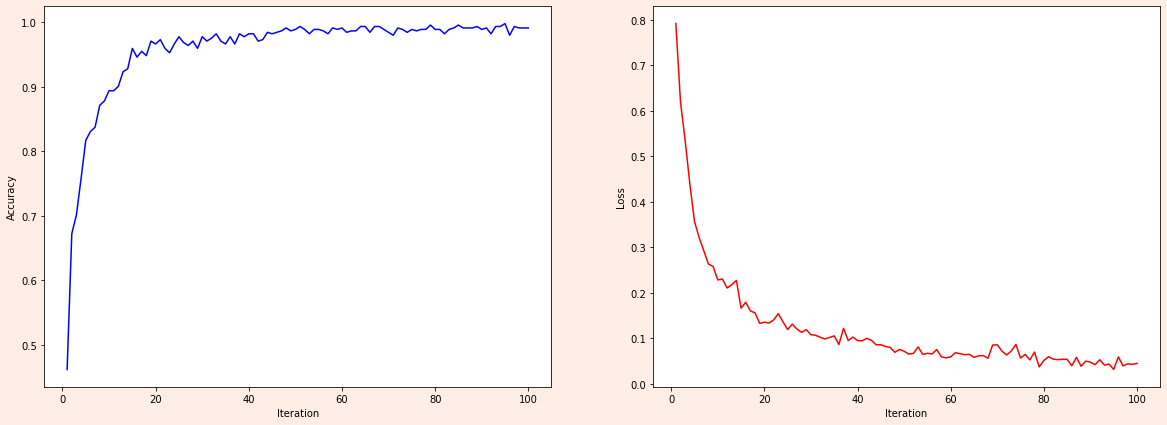

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7),facecolor="#FEEEE6")

ax1.plot(range(1,101),my_model.history['accuracy'],'b')
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax2.plot(range(1,101),my_model.history['loss'],'r')
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Loss")


Validation or Test Accuracy and Loss with each epoch/iterations

Text(0, 0.5, 'Loss')

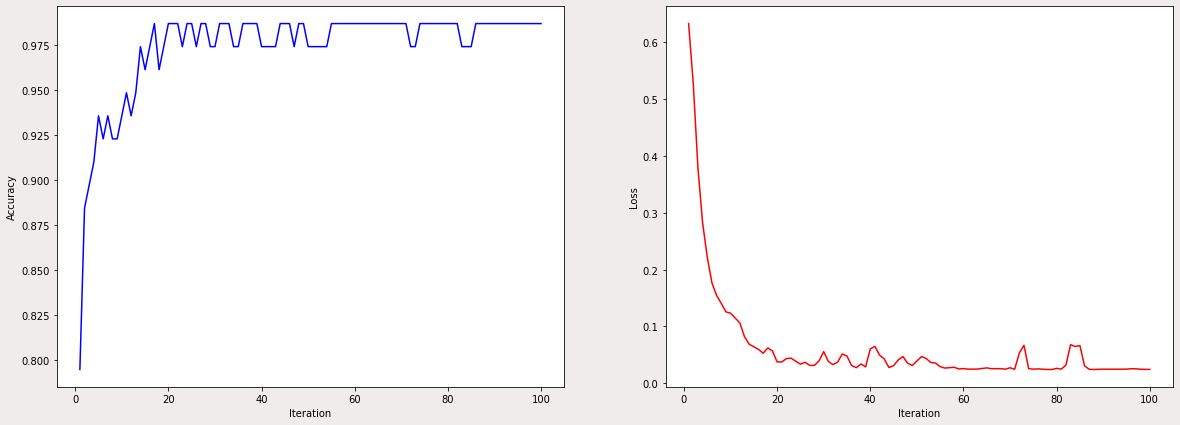

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7),facecolor="#F0ECEC")

ax1.plot(range(1,101),my_model.history['val_accuracy'],'b')
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax2.plot(range(1,101),my_model.history['val_loss'],'r')
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Loss")


# Confusion matrix for our prediction 

In [ ]:
Y_pred1=model.predict(X_train)
Y_pred2=model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,f1_score
matrix = confusion_matrix(Y_train.argmax(axis=1),Y_pred1.argmax(axis=1))
print("train set confusion matrix")
print(matrix)
print('True positive = ', matrix[0][0])
print('False positive = ', matrix[0][1])
print('False negative = ', matrix[1][0])
print('True negative = ', matrix[1][1])

matrix1 = confusion_matrix(Y_test.argmax(axis=1),Y_pred2.argmax(axis=1))
print("test set confusion matrix")
print(matrix1)
print('True positive = ', matrix1[0][0])
print('False positive = ', matrix1[0][1])
print('False negative = ', matrix1[1][0])
print('True negative = ', matrix1[1][1])


train set confusion matrix
[[167   2]
 [  0 273]]
True positive =  167
False positive =  2
False negative =  0
True negative =  273
test set confusion matrix
[[30  1]
 [ 0 47]]
True positive =  30
False positive =  1
False negative =  0
True negative =  47


# F1 score,Recall score ,Specificity,Precision performance of the model

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,f1_score

#printing errors of test data
print('test Recall Score:', recall_score(Y_train.argmax(axis=1),Y_pred1.argmax(axis=1)))
print('test Recall Score:', recall_score(Y_test.argmax(axis=1),Y_pred2.argmax(axis=1)))

print('train Precission score',precision_score(Y_train.argmax(axis=1),Y_pred1.argmax(axis=1)))
print('test Precission score',precision_score(Y_test.argmax(axis=1),Y_pred2.argmax(axis=1)))

print('train f1 score',f1_score(Y_train.argmax(axis=1),Y_pred1.argmax(axis=1)))
print('test f1 score',f1_score(Y_test.argmax(axis=1),Y_pred2.argmax(axis=1)))

print('train specificity score',matrix[0][0]/(matrix[0][0]+matrix[0][1]))
print('test specificity score',matrix1[0][0]/(matrix1[0][0]+matrix1[0][1]))

test Recall Score: 1.0
test Recall Score: 1.0
train Precission score 0.9927272727272727
test Precission score 0.9791666666666666
train f1 score 0.9963503649635036
test f1 score 0.9894736842105264
train specificity score 0.9881656804733728
test specificity score 0.967741935483871


# Different Algorithm models performance analysis 

In [ ]:
import plotly.graph_objects as go

In [ ]:
y_tr=[ 0.9276	  ,0.9095	     ,0.9208	  ,0.9208	   ,0.9547,	0.9915	,0.9699]
y_tst=[0.9358	 , 0.8974	     ,0.9358	  ,0.9102	  , 0.9487	,0.9872	,1.0]
x= ['LR','NB','KNN','DT','RF','ANN','ANN+Embeddings']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Test'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Variation Of Accuracy With Different Models',xaxis_title="Models",
    yaxis_title="Accuracy",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.8, 1])
fig.show()

In [ ]:
y_tr=[ 0.9411	  ,0.9270	     ,0.9323	  ,0.9353	   ,0.9629,	0.9963	,0.9749]
y_tst=[0.9462	  ,0.9148	     ,0.9450,	  0.9247	  , 0.9565	,0.9894	 ,1.0]
x= ['LR','NB','KNN','DT','RF','ANN','ANN+Embeddings']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Test'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Variation Of F1 Score With Different Models',xaxis_title="Models",
    yaxis_title="F1 Score",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.8, 1])
fig.show()

In [ ]:
y_tr=[ 0.9446	  ,0.9236	     ,0.9877	  ,0.9440	   ,0.9737	,0.9927	,0.9628]
y_tst=[	 0.9565	 , 0.9148	    , 0.9772	 , 0.9347	   ,0.9777	,0.9791	,1.0]
x= ['LR','NB','KNN','DT','RF','ANN','ANN+Embeddings']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Test'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Variation Of Precision With Different Models',xaxis_title="Models",
    yaxis_title="Precision")
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.8, 1])
fig.show()

In [ ]:
y_tr=[0.9377	  ,0.9304	     ,0.8827	  ,0.9267	   ,0.9523,	1.0000	,0.9882]
y_tst=[ 0.9361	  ,0.9148	     ,0.9148	,  0.9148	   ,0.9361	,1.0000	,1.0]
x= ['LR','NB','KNN','DT','RF','ANN','ANN+Embeddings']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Test'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Variation Of Recall With Different Models',xaxis_title="Models",
    yaxis_title="Recall",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.8, 1])
fig.show()

In [ ]:
y_tr=[0.9112	 , 0.8757	    , 0.9822	 , 0.9112	   ,0.9585,	0.9881	 ,0.9455]
y_tst=[ 0.9354	  ,0.8709	     ,0.9677	  ,0.9032	  , 0.9677	,0.9677	,1.0]
x= ['LR','NB','KNN','DT','RF','ANN','ANN+Embeddings']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Test'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Variation Of Specificity With Different Models',xaxis_title="Models",
    yaxis_title="Specificity",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.8, 1])
fig.show()